The goal of our deep learning model, a Transformer, is to analyze game reviews and classify the sentiments associated with these reviews.  
To train our model, we will use the "Steam Reviews" dataset, available at: https://www.kaggle.com/datasets/andrewmvd/steam-reviews.  
This dataset includes, among other features, 6.4 million English reviews from the Steam platform.  
Each review in the dataset is labeled with its sentiment: 1 for positive and -1 for negative.  
The objective of our model is to take a game review as input and predict whether the sentiment is positive or negative.  
To implement the model, we will use the Keras API provided by TensorFlow.

---
# 1/ Data preprocessing

Before implementing the Transformer and training it with our data, it is necessary to :  
- Load the dataset (store in .csv format in the "datasets" folder)
- Seperate this dataset in train data, validation data and test data
- Transform these initial text data into token sequences
- Pad these sequences to ensure they have the same length

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import random
from sklearn.model_selection import train_test_split

## Dataset importing and processing

In [2]:
# Loading the dataset
dataset = pd.read_csv("datasets/dataset.csv")

In [3]:
# Data overview
print(dataset.head())

   app_id        app_name                                        review_text  \
0      10  Counter-Strike                                    Ruined my life.   
1      10  Counter-Strike  This will be more of a ''my experience with th...   
2      10  Counter-Strike                      This game saved my virginity.   
3      10  Counter-Strike  • Do you like original games? • Do you like ga...   
4      10  Counter-Strike           Easy to learn, hard to master.             

   review_score  review_votes  
0             1             0  
1             1             1  
2             1             0  
3             1             0  
4             1             1  


In [4]:
print("Number of reviews :", len(dataset))

Number of reviews : 6417106


As this dataset includes 6.4 million reviews, this number is too high, so it is necessary to keep only a portion of these reviews by selecting them randomly.

In [5]:
# Choice of the sample size
sample_size = 100000

# Randomly select review indices
index_reviews_kept = random.sample(range(len(dataset)), sample_size)

Then, we will keep the data that interest us: review content ('review_text') and their associated sentiment ('review_score').

In [6]:
# Extracting data by converting it into a numpy array and setting the review format to string
X = np.array(dataset.iloc[index_reviews_kept].review_text, dtype = "str")
y = np.array(dataset.iloc[index_reviews_kept].review_score)

In [7]:
for i in range(3) :
    print(y[i], X[i])

1  Early Access Review
1 continues great gameplay from the first game
1 What can I say about this timeless masterpiece?!?!'? Some of the best action around mixed with a deep story and amazing story telling make this an exhilirating and engaging experience like never before. It's 2013, and I'm still impressed.


In [8]:
# Set the sentiment value for negative sentiment to 0
y[y == -1] = 0

Moreover, we will split the data into training, validation, and test sets to train the transformer model.  
The training set will contain 60% of the initial data, while the validation and test sets will each contain 20% of the initial data.

In [9]:
# Split the data using the train_test_split function from scikit-learn
X_train, X_test_full, y_train, y_test_full = train_test_split(X, y, train_size = 0.6, random_state = 42)

In [10]:
X_val, y_val = X_test_full[:int(len(X_test_full)/2)], y_test_full[:int(len(X_test_full)/2)]
X_test, y_test = X_test_full[int(len(X_test_full)/2):], y_test_full[int(len(X_test_full)/2):]

In [11]:
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(60000,) (20000,) (20000,)
(60000,) (20000,) (20000,)


## Tokenisation of text data

This step consists of transforming the review's words into tokens in order to make this data readable by the AI model.

In [12]:
# Maximum number of words for the token dictionary
num_words = 4000

# Instantiate the Tokeniser and fit it on the training data
tokenizer = Tokenizer(num_words = num_words, oov_token = "UNK")
tokenizer.fit_on_texts(X_train)

In [13]:
print("Number of different words in the data : %d" % len(tokenizer.word_docs))

Number of different words in the data : 66498


In [14]:
max_occurences_oov_words = tokenizer.word_counts[tokenizer.index_word[num_words]]
print("Maximum number of occurrences for OOV words :" , max_occurences_oov_words)

Maximum number of occurrences for OOV words : 50


Convert sentences composed of words into sequences of tokens.

In [15]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_val_sequences = tokenizer.texts_to_sequences(X_val)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [16]:
print(X_train_sequences[:3])

[[791, 1503, 5, 105, 1509, 5, 91, 12, 6, 132, 64, 21, 91, 2, 6, 23, 10, 307, 20, 2, 238, 87, 1, 1851, 4, 321, 109, 8, 94, 1924, 1, 3, 1026, 1, 22, 75, 73, 5, 54, 9, 21, 107, 551, 703, 117, 23, 10, 68, 20, 2, 586, 6, 81, 39, 1, 97, 1463, 2, 1309, 290, 8, 376, 665, 1141, 1, 43, 2, 376, 665, 948, 20, 245, 3618, 54, 1635, 120, 285, 139, 8, 988, 70, 2, 6, 16, 12, 6, 9, 21, 164, 67, 7, 905, 13, 4, 36, 3, 127, 98, 340, 54, 80, 1, 2, 2993, 3, 2550, 781, 12, 6, 1022, 2, 293, 9, 1944, 47, 19, 1510, 707, 102, 1510, 707, 3, 2, 151, 9, 864, 73, 9, 4, 3088, 1, 8, 1, 7, 20, 1, 108, 93, 8, 12, 6, 3, 7, 79, 131, 7, 20, 4, 186, 98, 5, 112, 13, 196, 740, 10, 19, 1636, 1312, 72, 4, 1304, 14, 463, 5, 25, 2861, 11, 9, 494, 10, 26, 501, 18, 5, 251, 740, 130, 10, 26, 972, 1188, 73, 9, 2133, 5, 25, 376, 665, 302, 1323, 1, 10, 656, 85, 743, 369, 77, 2, 1, 1090, 72, 370, 12, 1323, 2, 6, 9, 21, 1027, 11, 9, 50, 1, 1, 23, 120, 6, 63, 1013, 12, 3718, 11, 52, 708, 50, 1, 55, 8, 42, 1022, 2, 674, 13, 376, 665, 1141, 

## Padding the sequences

Next, it is necessary to pad these sequences : since they don't have all the same lengths (the sentences don't all contain the same number of words), they can't be used by the model.  
We will pad these sequences by truncading those that exceed a predifined maximum length (= "maxlen"), and filling the shorter sequences with zeros until they reach maxlen.

To choose a coherent maximum sequence length, we will analyze the length of our sequence using Pandas Series.

In [17]:
# Create a Pandas Series that contains the sequence lengths as values
sequence_lengths = pd.Series([len(review) for review in X_train_sequences])
print("Length of the first 3 sequences:", sequence_lengths.head(3), sep = "\n")

Length of the first 3 sequences:
0    1309
1      31
2      23
dtype: int64


In [18]:
# Statistical description of sequence lengths
print(sequence_lengths.describe())

count    60000.000000
mean        56.435850
std        109.447465
min          0.000000
25%          6.000000
50%         20.000000
75%         58.000000
max       1722.000000
dtype: float64


In [19]:
print(sequence_lengths.quantile(q = 0.98))

391.0


Histogram of sequence lengths :


<Axes: >

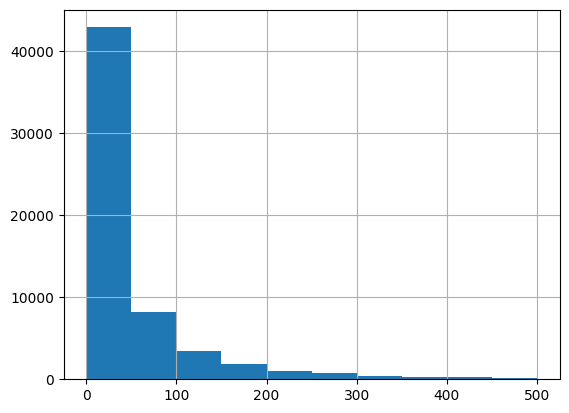

In [20]:
print("Histogram of sequence lengths :")
sequence_lengths.hist(range = (0, 500))

We see that if we choose to keep the first 400 elements of all sequences, we will retain the full content of more than 98% of them, which seems to be reasonable.  
So now, we will pad these sequences by setting the "maxlen" parameter to 400.

In [21]:
maxlen = 400
X_train_padded = pad_sequences(X_train_sequences, maxlen = maxlen)
X_val_padded = pad_sequences(X_val_sequences, maxlen = maxlen)
X_test_padded = pad_sequences(X_test_sequences, maxlen = maxlen)

In [22]:
print("Class of X_train_sequences :", type(X_train_sequences))
print("Class of X_train_padded", type(X_train_padded))
print("Dimension of X_train_padded :", np.shape(X_train_padded))

Class of X_train_sequences : <class 'list'>
Class of X_train_padded <class 'numpy.ndarray'>
Dimension of X_train_padded : (60000, 400)


We can see that our data is now contained in Numpy arrays, where each row of these arrays corresponds to a token sequence, while each column corresponds to a token.  
As a result, we have a trainable dataset for the AI model.

---
# 2/ Create the "Transformer" AI model

In [ ]:
In this part, we will implement the structure of our Transformer, that will be used to classify the sentiment of the reviews.  
To do this, we will use 